# Linear RegressionProject

In [1]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import csv
import requests
import time 
import os
import re
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import seaborn as sns
import stat
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [75]:
df = pd.read_csv('face_creams.csv')

In [76]:
df.head()

,product_title,Price,Review,Rating
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",AU$22.95,965.0,4.5/5 - 965 Reviews
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",AU$14.35,1562.0,4.5/5 - 1562 Reviews
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",AU$22.95,1167.0,4.5/5 - 1167 Reviews
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",AU$19.13,1356.0,4.4/5 - 1356 Reviews
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",AU$16.45,20523.0,4.5/5 - 20523 Reviews


# Data cleaning 

In [4]:
df.rename(columns={'product_title':'Name'}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1010 non-null   object 
 1   Price   1010 non-null   object 
 2   Review  948 non-null    float64
 3   Rating  948 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.7+ KB


In [6]:
df.shape

(1010, 4)

In [7]:
df1=df.dropna()

In [8]:
df1.dtypes

Name       object
Price      object
Review    float64
Rating     object
dtype: object

In [9]:
df1.shape

(896, 4)

In [10]:
df1.head()

,Name,Price,Review,Rating
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",AU$22.95,965.0,4.5/5 - 965 Reviews
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",AU$14.35,1562.0,4.5/5 - 1562 Reviews
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",AU$22.95,1167.0,4.5/5 - 1167 Reviews
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",AU$19.13,1356.0,4.4/5 - 1356 Reviews
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",AU$16.45,20523.0,4.5/5 - 20523 Reviews


In [14]:
df1.Price = df1.Price.str.replace('U', '')
df1

,Name,Price,Review,Rating
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",22.95,965.0,4.5/5 - 965 Reviews
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",14.35,1562.0,4.5/5 - 1562 Reviews
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",22.95,1167.0,4.5/5 - 1167 Reviews
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",19.13,1356.0,4.4/5 - 1356 Reviews
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",16.45,20523.0,4.5/5 - 20523 Reviews
...,...,...,...,...
938,"TruSkin, Peptide Eye Gel, 0.5 fl oz (15 ml)",25.49,4.0,4.2/5 - 1241 Reviews
943,"Advanced Clinicals, Puffy Eye Serum, Professio...",20.64,17.0,4.3/5 - 311 Reviews
944,"Cos De BAHA, Centella Gel Cream, 1.5 fl oz (45...",15.92,11.0,4.1/5 - 569 Reviews
945,"Cos De BAHA, NZ, Niacinamide 20 Zinc PCA 4, 1 ...",20.70,6.0,4.5/5 - 248 Reviews


In [15]:
df1.Price = df1.Price.astype('float') 

In [16]:
df1.head()

,Name,Price,Review,Rating
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",22.95,965.0,4.5/5 - 965 Reviews
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",14.35,1562.0,4.5/5 - 1562 Reviews
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",22.95,1167.0,4.5/5 - 1167 Reviews
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",19.13,1356.0,4.4/5 - 1356 Reviews
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",16.45,20523.0,4.5/5 - 20523 Reviews


In [17]:
df1.Rating=df1.loc[:946].Rating.map(
  lambda x: str.split(x, "/")[0]
)

In [18]:
df1.head()

,Name,Price,Review,Rating
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",22.95,965.0,4.5
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",14.35,1562.0,4.5
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",22.95,1167.0,4.5
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",19.13,1356.0,4.4
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",16.45,20523.0,4.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1010 non-null   object 
 1   Price   1010 non-null   object 
 2   Review  948 non-null    float64
 3   Rating  948 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.7+ KB


In [20]:
df1.Rating = df1.Rating.astype('float') 

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 946
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    896 non-null    object 
 1   Price   896 non-null    float64
 2   Review  896 non-null    float64
 3   Rating  896 non-null    float64
dtypes: float64(3), object(1)
memory usage: 67.3+ KB


In [22]:
df1.dtypes

Name       object
Price     float64
Review    float64
Rating    float64
dtype: object

# EDA

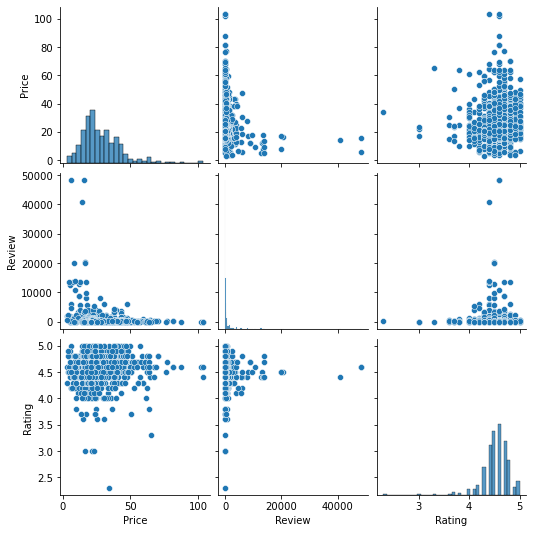

In [23]:
sns.pairplot(df1)

In [24]:
corr = df1.corr()
corr

,Price,Review,Rating
Price,1.000000,-0.169076,0.059355
Review,-0.169076,1.000000,-0.020193
Rating,0.059355,-0.020193,1.000000


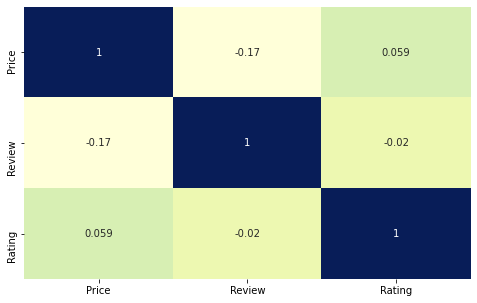

In [25]:
plt.figure(figsize = (8,5))
sns.heatmap(corr,cbar=False, annot=True,cmap="YlGnBu")
plt.show()

In [26]:
df1.describe()

,Price,Review,Rating
count,896.000000,896.000000,896.000000
mean,28.015145,843.503348,4.534487
std,13.735966,3285.502391,0.259618
min,3.190000,1.000000,2.300000
25%,18.305000,39.000000,4.400000
50%,24.870000,129.000000,4.600000
75%,35.265000,484.250000,4.700000
max,103.600000,48426.000000,5.000000


# Feature Engineer

In [47]:
df1['brand']=df1.loc[:946].Name.map(
  lambda x: str.split(x, ",")[0]
)

In [48]:
df1.head(100)

,Name,Price,Review,Rating,brand
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",22.95,965.0,4.5,PrescriptSkin
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",14.35,1562.0,4.5,PrescriptSkin
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",22.95,1167.0,4.5,PrescriptSkin
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",19.13,1356.0,4.4,Sympli Beautiful
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",16.45,20523.0,4.5,Eucerin
...,...,...,...,...,...
95,"Source Naturals, Skin Eternal Cream, 2 oz (56....",22.69,4024.0,4.4,Source Naturals
96,"Dear, Klairs, Midnight Blue Calming Cream, 2 o...",47.82,1338.0,4.7,Dear
97,"Leven Rose, 100% Pure & Organic, Carrot Seed O...",22.27,611.0,4.4,Leven Rose
98,"Andalou Naturals, Perfecting Cream, Goji Pepti...",43.02,1509.0,4.6,Andalou Naturals


In [49]:
#new_Airbnb
df1['brand'].value_counts()

Andalou Naturals    34
Derma E             23
Acure               21
Olay                19
InstaNatural        18
                    ..
Burt's Bees          1
Dr. Mercola          1
Wow Skin Science     1
Aromatica            1
Biorace              1
Name: brand, Length: 202, dtype: int64

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['brand_label'] = le.fit_transform(df1['brand'])

In [51]:
df1.head()

,Name,Price,Review,Rating,brand,brand_label
0,"PrescriptSkin, Retinol Night Cream, 1.55 oz (4...",22.95,965.0,4.5,PrescriptSkin,131
1,"PrescriptSkin, Vitamin C Moisturizer, Enhanced...",14.35,1562.0,4.5,PrescriptSkin,131
2,"PrescriptSkin, Stem Cell Cream, 2.25 oz (64 g)",22.95,1167.0,4.5,PrescriptSkin,131
3,"Sympli Beautiful, All Day Hydration Cream, 2 o...",19.13,1356.0,4.4,Sympli Beautiful,174
4,"Eucerin, Q10 Anti-Wrinkle Face Cream, 1.7 oz (...",16.45,20523.0,4.5,Eucerin,62


In [52]:
New=df1[['Price','Review','Rating','brand_label']]
New



,Price,Review,Rating,brand_label
0,22.95,965.0,4.5,131
1,14.35,1562.0,4.5,131
2,22.95,1167.0,4.5,131
3,19.13,1356.0,4.4,174
4,16.45,20523.0,4.5,62
...,...,...,...,...
938,25.49,4.0,4.2,186
943,20.64,17.0,4.3,5
944,15.92,11.0,4.1,39
945,20.70,6.0,4.5,39


<AxesSubplot:>

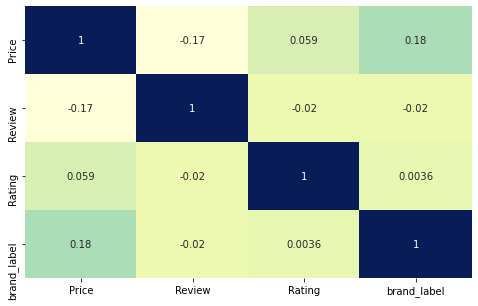

In [53]:
plt.subplots(figsize=(8,5))
sns.heatmap(New.corr(),cbar=False, annot=True,cmap="YlGnBu")

In [54]:
New.head()

,Price,Review,Rating,brand_label
0,22.95,965.0,4.5,131
1,14.35,1562.0,4.5,131
2,22.95,1167.0,4.5,131
3,19.13,1356.0,4.4,174
4,16.45,20523.0,4.5,62


# Splitting the data


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)


In [56]:
X = New.drop(['Price','Review'], axis = 1)#Review the perfect for linear
y =New['Price']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

# Linear Regression 

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#print(y_pred)
print(r2_score(y_test, y_pred))

0.05454731955942049


In [58]:
val_score = lr.score(X_val, y_val)  
val_score

0.049960955693037934

In [59]:
train_score = lr.score(X_train, y_train)
train_score

0.02583749637236532

In [60]:
test_score = lr.score(X_test, y_test)
test_score

0.05454731955942049

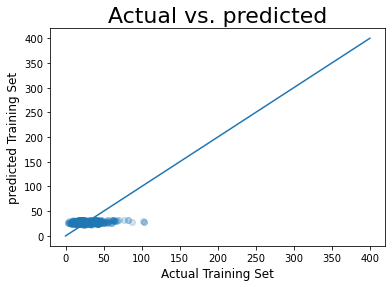

In [62]:
y_train_pred = lr.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

# Polynomial Regression

In [66]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
print(Plr.score(X_train_poly, y_train))

0.03833418038490355


In [68]:
print(Plr.score(X_test_poly, y_test))

0.09042360360911883


In [69]:
print(Plr.score(X_val_poly, y_val))

0.07475321690387748


In [114]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [115]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.058
Ridge Regression val R^2: 0.058
Degree 2 polynomial regression val R^2: -0.115


In [116]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.078


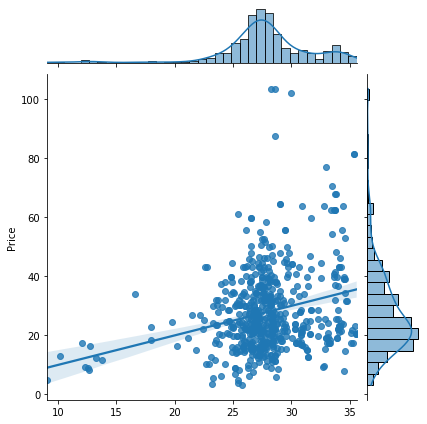

In [117]:
preds = lm_poly.predict(X_train_poly) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train, kind='reg')

# Polynomial Regression

In [71]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)

LinearRegression()

In [72]:
print(Plr.score(X_train_poly, y_train))

0.03833418038490355


In [73]:
print(Plr.score(X_test_poly, y_test))

0.09042360360911883


In [74]:
print(Plr.score(X_val_poly, y_val))

0.07475321690387748


In [122]:
print(f'Linear Regression val R^2: {lm.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: -2.759


In [300]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_train,preds)

24.97241335705189

In [301]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_train,preds)

25.04154561188913

In [303]:
def SSE(actuals, preds): #sum squared error
    return np.sum((actuals - preds)**2)

SSE(y_train,preds)

def SST(y): #Total sum squared
    return np.sum((y - np.mean(y))**2)

SST(y_train)

143.83911242466553

In [304]:
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_train,preds)

-2492.6832948100223

In [305]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# cross Vali
lr=LinearRegression()
lr.fit(X_train,y_train)
val = KFold(n_splits = 5)
cv_res = cross_val_score(lr,X_train,y_train,cv = val ,scoring = 'r2')
print('The R^2: ',cv_res.mean())
y_pred=lr.predict(X_val)
score = r2_score(y_val,y_pred)
mse = mean_squared_error(y_pred,y_val)
print('Testing R^2: ',score)
print('Mean Squared Error:' ,mse)

The R^2:  0.004021648421245305
Testing R^2:  0.03221127404472146
Mean Squared Error: 0.29119490230226475
